<h1>Fluorescence Anisotropy Analysis</h1>

An example fluorescence anisotropy data analysis is presented below to demonstrate the functinoality of the package. The analysed data is from a protein titration assay, however the presented workflow and commands are the same for both protein and tracer titration assays. For analysis of competition experment data refer to the *competition experiment demo file*.

<h2>Installing the package</h2>

The `fluanisotropyanalysis` package can be downloaded from PyPI software repository and installed (along with dependencies) using the following command:

`pip install fluanisotropyanalysis`

<h3>Importing the package</h3>

To access the functionality of the `fluanisotropyanalysis` package, import it using the folowing line:

In [1]:
from fluanisotropyanalysis.flu_ani_analysis import FA

<h2>Importing raw data</h2>

You can import the raw data in csv format that was exported from Perkin Elmer Envision instruments using the `read_in_envision` function. The following formats are supported: *list A*, *list B*, *list C*, *plate 1* and *plate 2*, and plate sizes of 96 and 384 wells. The `data_type` argument can be either `'plate'` for any of the plate formats or `'list'` for any of the list formats.

Reading in the data requires a separate plate map file that contains information about contents of every well such as protein name, tracer name, protein concentration, etc. The *Type* column should specify whether the well is a control (*blank*) or a test well. Please note that the *Competitor Name* column should be left unfilled for portein/tracer titration platemaps.

In [2]:
data_file = 'protein_titration_data_set.csv'         # Note that this will only work if the files are in the same folder
platemap_file = 'protein_titration_platemap.csv'     # as this Jupyter notebook, 
                                                     # alternatively you can provide a full file path

my_data = FA.read_in_envision(data_csv=data_file, platemap_csv=platemap_file, data_type='plate', size=384)

Data was uploaded!

Number of repeats: 1 
Value of g-factor: 1.0 
Overall number of empty cells is 192 in 2 data frames.
Proteins: ['Protein 1' 'Protein 2']
Tracers: ['Tracer']
Competitors: None



<h2>Visualising the data for each well</h2>

You can display the contents of each well (both the imported data and data from platemap) using the `visualise` function. 

The `labelby` argument specifes what is displayed on the well and `colorby` argument controls its color. All the platemap column names such as *Type*, *Contents*, *Protein Name*, *Protein Concentration*, *Tracer Name*, *Tracer Concentration* can be passed as `labelby` and `colorby` arguments. To display the imported data such as *p* and *s* channel intensity, pass a tuple of repeat number and the specified variable, e.g. `labelby=('repeat_1, 'p')`.

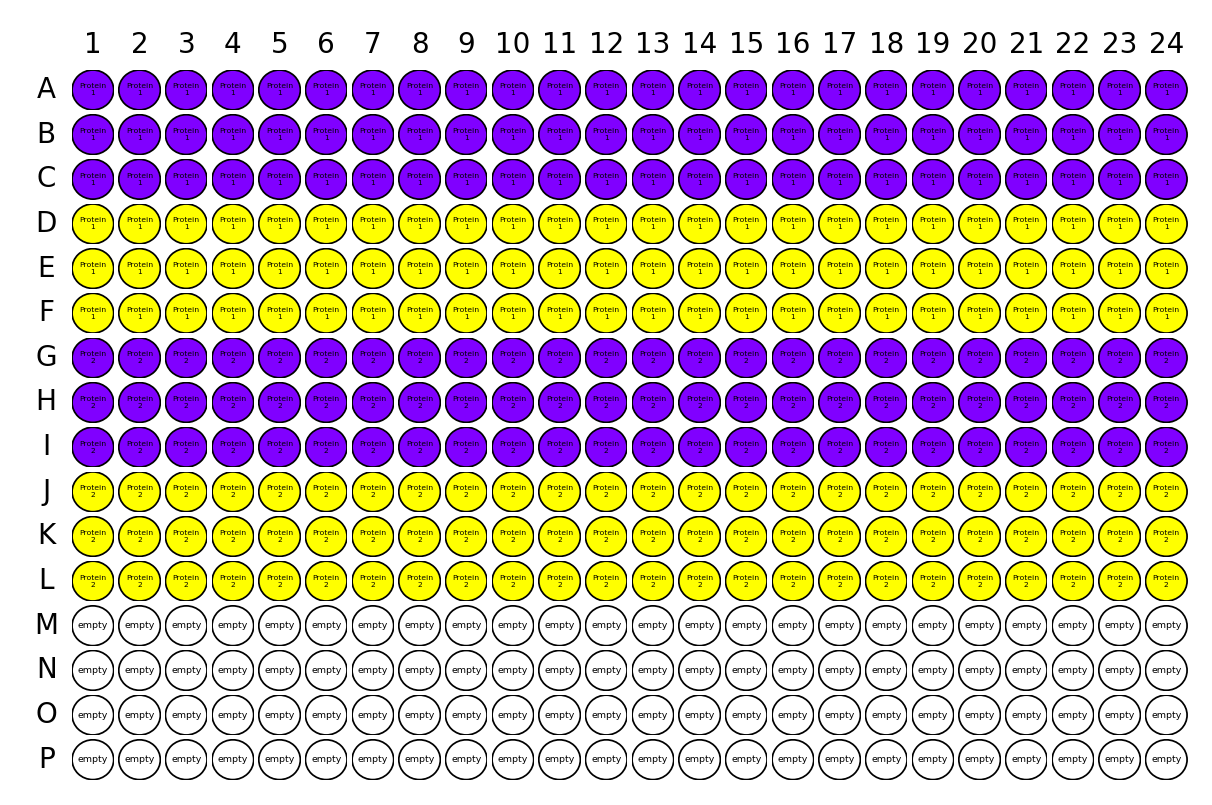

In [3]:
my_data.visualise(labelby='Protein Name', colorby='Type')

If the `colorby` argument represents numerical data (e.g. *Protein Concentration*) the well colour indicates magnitude of the number (where purple represents the smallest numbres and red the largest numbers).

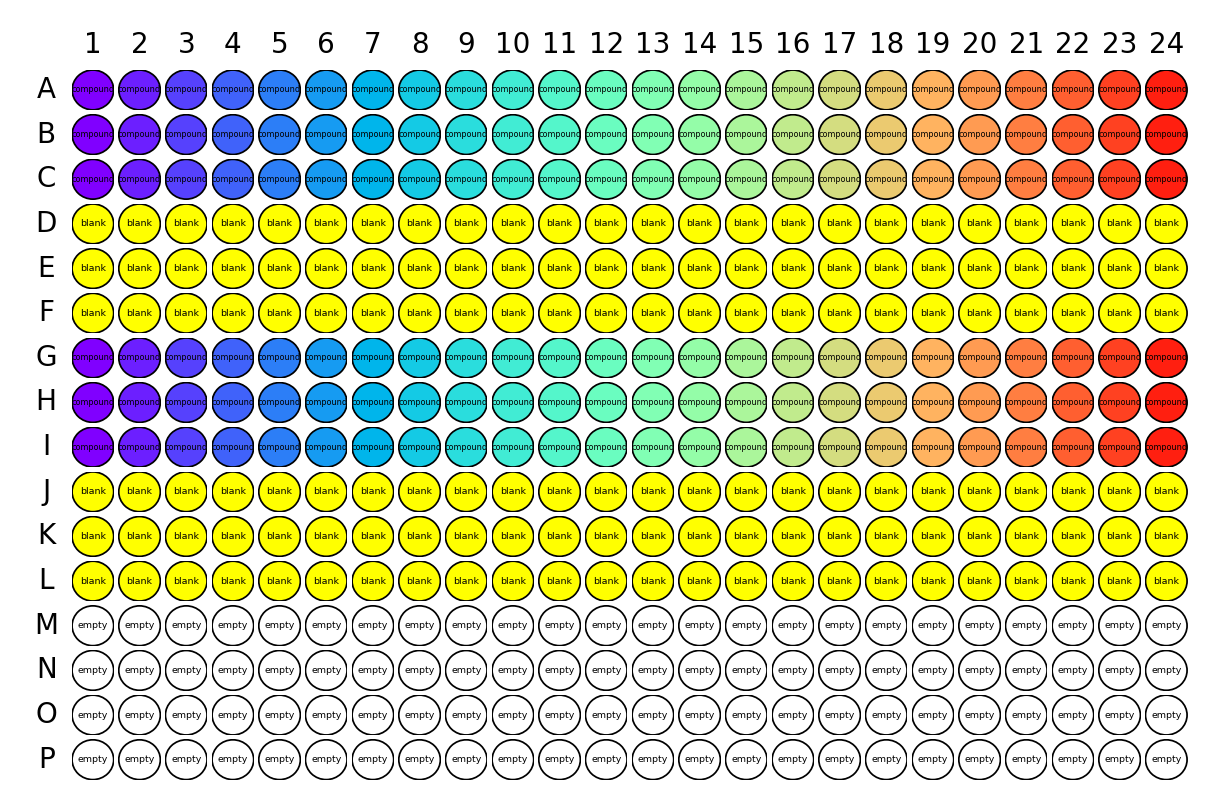

In [4]:
my_data.visualise(labelby='Type', colorby='Protein Concentration')

<h2>Invalidation</h2>

You can invalidate individual `wells` and/or entire `rows` or `columns` by passing any of those three keyword arguments or their combination to the `invalidate` function. The invalidated wells will not be taken into consideration in subseqent calculations or displayed on the graphs. They can be made valid again by additionally passing the `valid=True` argument. If you invalidate well after performing some calulations (e.g. background correction or caluculation of anisotropy) you have execute the calculations again for the effect to take place.

In [5]:
my_data.invalidate(wells=['A1', 'C3'])

The invalideted wells are marked with red stripes:

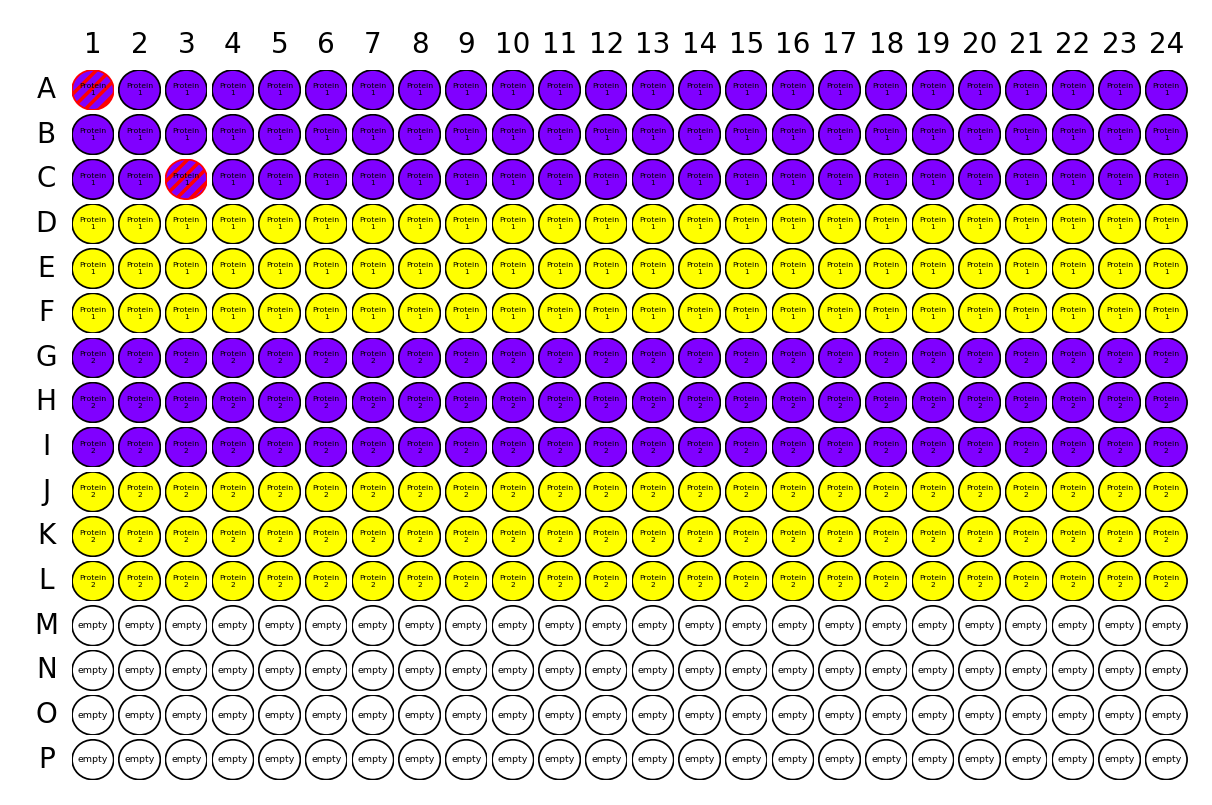

In [6]:
my_data.visualise(labelby='Protein Name', colorby='Type')

<h2>Background correction</h2>

To calculate the background corrected values for *p* and *s* channel intensity in all repeats use the `background_correct` function.

The backgorund correction is done by subtracting the mean value of blank *p* (or *s*) channel intensity for a given protein (or tracer) concentration from each non-blank value of the *p* (or *s*) channel intensity for that concentration. 

Background correction can be performed multiple times on a sigle data set, the existing corrected data will be overwritten.

In [7]:
my_data.background_correct()

Background correction was successfully performed!


To display and colour by the background corrected values, use the *p_corrected* or *s_corrected* as a variable along the repeat number in the `visualise` function. By default the blank wells coloured yellow, however this can be turned off by passing `blank_yellow=False`. In this case the blank values will also be linearly scaled and colours generated for them.

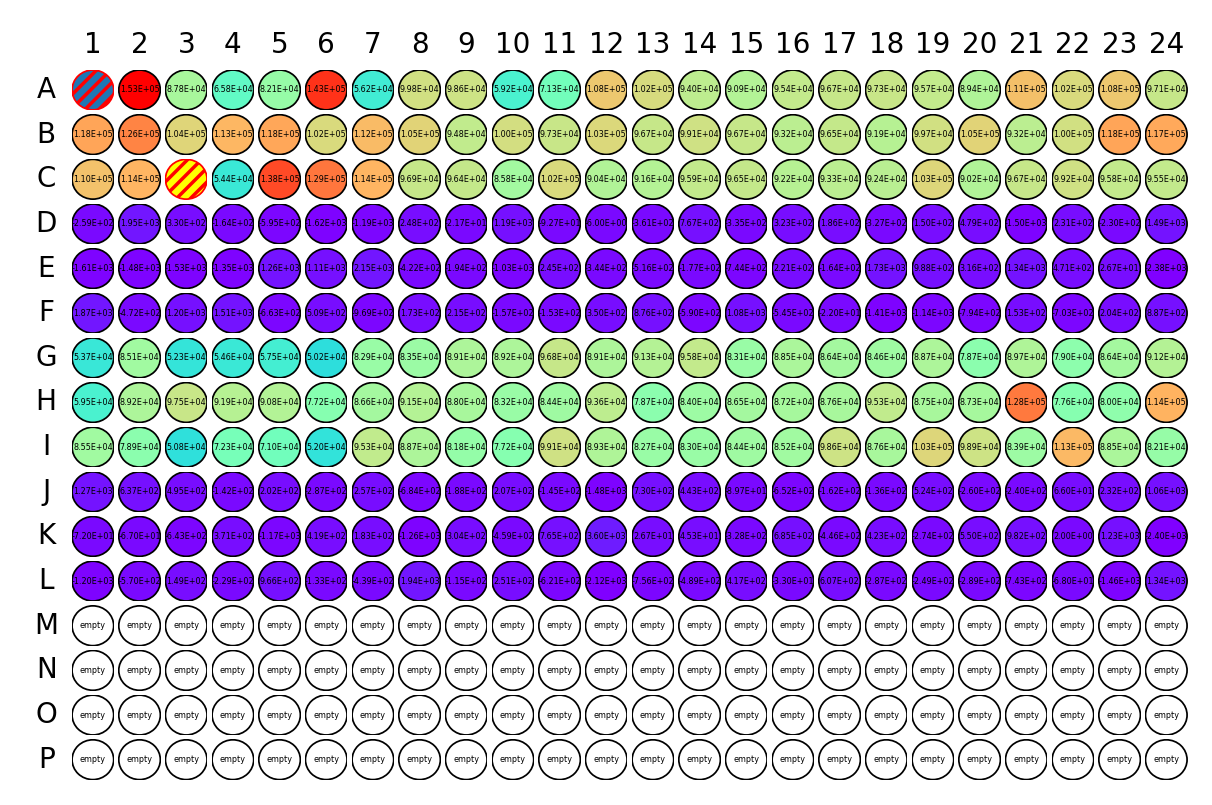

In [10]:
my_data.visualise(labelby=('repeat_1', 'p_corrected'), colorby=('repeat_1', 'p_corrected'), blank_yellow=False)

<h2>Anisotropy and intensity calculation</h2>

The `calc_r_i` function calculates the anisotropy and intensity for each well in all repeats using the following formulas:

<p>$I = s + 2gp$</p>

<p>$r = \frac{s - gp}{I}$</p>

<p>Where <em>I</em> is fluorescence intensity, <em>r</em> is anisotropy, <em>g</em> is g factor, <em>p</em> is p channel intensity, <em>s</em> is s channel intensity.</p>
         
If the `correct=False` argument is passed the anisotropy an fluorescence inensity will only be calculated using the raw *p* and *s* channel values and not the background corrected values. The variables for the `visualise` funtion are: *i_raw*, *r_raw*, *i_corrected* and *r_corrected*.

The functinon also calculates the percentage intesity of the non blank well as comapred to the blank corrected wells. By default the plot of the percentage intenstiy against the well ids for all repeats is displayed along with a summary of wells above the threshold (defaults to 80%, can be changed using the `thr` argument), however this feature can be turned off by passing the `plot_i=False` argument.

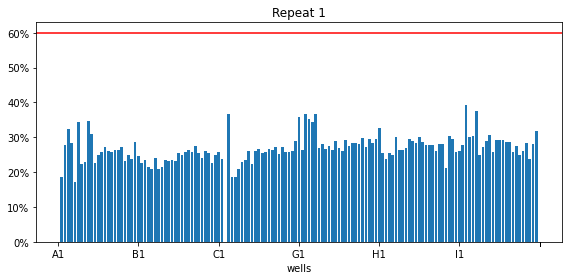

None of the wells has the percentage intensity value above the 60% threshold.


In [11]:
my_data.calc_r_i(thr=60)

If you want to just display the percetnage intensity plots after the anisotropy and intensity caluclation use the `plot_i_percent` function.

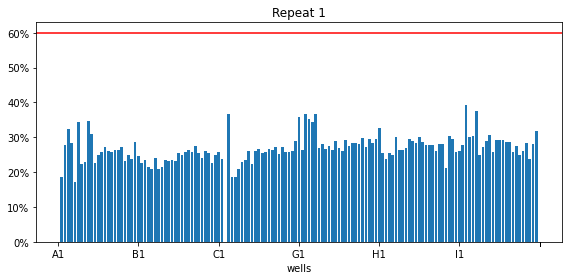

None of the wells has the percentage intensity value above the 60% threshold.


In [12]:
my_data.plot_i_percent()

The percentage intensity data can be displayed on the platemap using *i_percent* as avariable name. The `visualise` function can also scale the data for wells color-coding logarithmically (`scale='log'`) instead of default linear scaling.

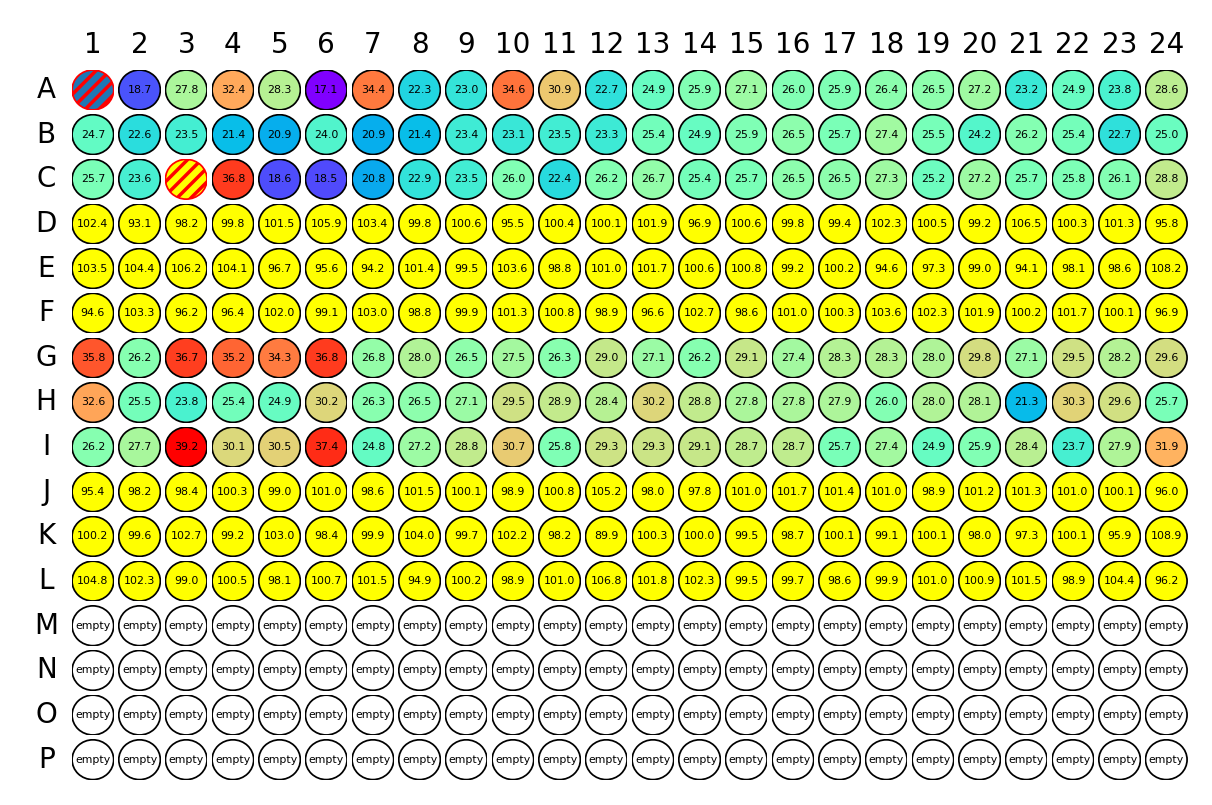

In [15]:
my_data.visualise(labelby=('repeat_1', 'i_percent'), colorby=('repeat_1', 'i_percent'), scale='log')

<h2>Mean anisotropy and intensity calculation</h2>

To calculate the mean anisotropy and intensity along with their standard deviation and standrad error for all replicates for a given protein (or tracer) concentration use `calc_mean_r_i` function. This data is required for subsequent logistic curve fitting.

In [16]:
my_data.calc_mean_r_i()

The mean anisotropy and intensity were successfully calculated.


<h2>Logistic curve fitting</h2>

The `logistic_fit` functinon fits a logistic curve to the plot of anisotropy and intensity against protein (or tracer) concentration using the following formula:

<p>$r = \frac{r_{min} - r_{max}}{1 + \bigl( \frac{p} {EC_{50}} \bigl) ^{hill}} + r_{max}$</p>

<p>Where <em>p</em> is protein concentration, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy, <em>EC<sub>50</sub></em> is midpoint of transition, <em>hill</em> is the slope.</p>

By default, the curve fitting is done for all protein-tracer pairs in all repeats and for both anisotropy and intensity data. However, you can use the `prot`, `trac`, `rep` and `var` arguments to specify lists of protein and tracer names, repeats and a  string representing the variable (`'r'` or `'i'`) for which the fitting will be performed. For example, to do the fitting only for the *Protein 1*  and *Tracer* in repeat 1 and for intensity data, pass `prot=['Protein 1']`, `trac=['Tracer']`, `rep=[1]`, `var='i'`.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `logistic_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [17]:
my_data.logistic_fit()

C:\Program Files (x86)\anaconda3\lib\site-packages\fluanisotropyanalysis\flu_ani_analysis.py:953: RuntimeWarning: The curve fitting failed in the following cases:

[('repeat_1', 'i', ('Protein 2', 'Tracer', '-'), RuntimeError('Optimal parameters not found: Number of calls to function has reached maxfev = 1000.'))]

Try passing additional keyword arguments to the fitting function.
  warnings.warn(f"The curve fitting failed in the following cases:\n\n{errors}\n\nTry passing additional keyword arguments to the fitting function.", RuntimeWarning)


If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases, try repeating the curve fitting for only the failed data passing additional keyword arguments such as `sigma`, `p0`, `bounds`, etc.

In [18]:
my_data.logistic_fit(prot=['Protein 2'], trac=['Tracer'],  var='i', sigma='std', p0=[500000, 300000, 1300, 2])

The logistic curve fitting was successfully performed.


You can display the plots of anisotropy and intensity against the protein (or tracer) concentration with a fitted logisitc curve for all repeats using the `plot_ani` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`).

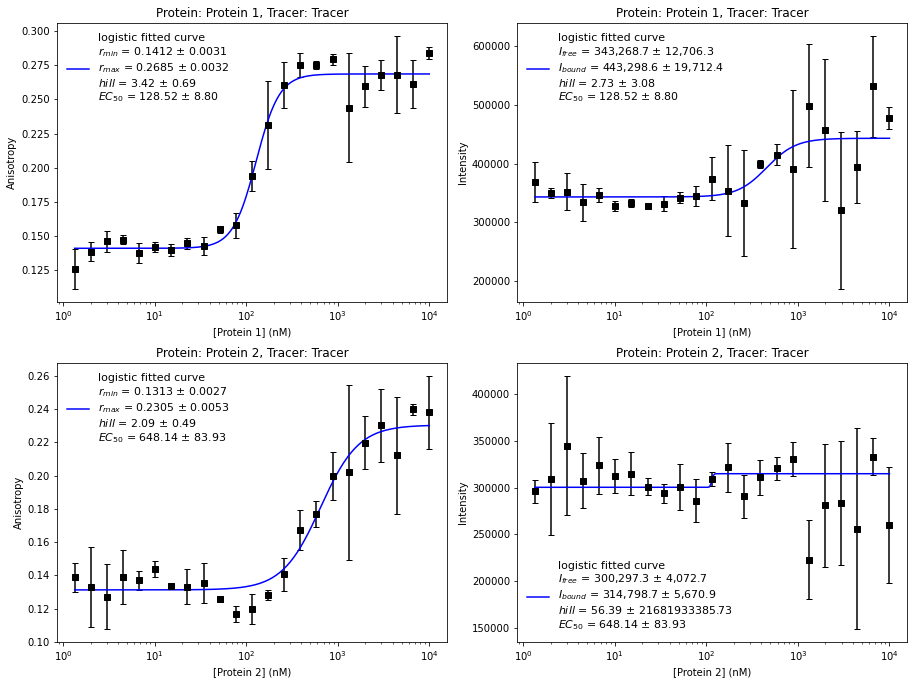

In [19]:
my_data.plot_ani()

By default, results for all protein-tacer pairs in all repeats are plotted. You can use the `prot`, `trac` and `rep`  arguments to specify lists of protein and tracer names and repeats for which the data will be plotted. For example, to plot data only for the *Protein 2*  and *Tracer* in repeat 1, pass `prot=['Protein 2']`, `trac=['Tracer']`, `rep=[1]`.

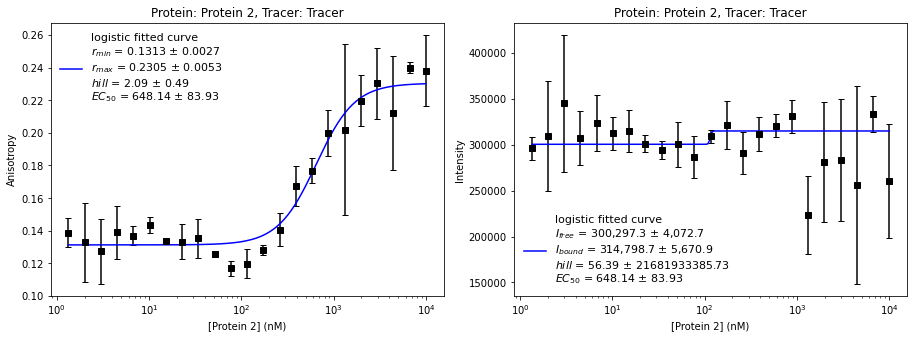

In [20]:
my_data.plot_ani(prot=['Protein 2'], trac=['Tracer'], rep=[1])

To export the anisotropy and intensity figures use the `save_ani_figs` function which, by default, saves figures for all protein-trcaer pairs in all repeats and for both anisotropy and intensity data in the same location as this Notebook. You can specify proteins, tracers, repeats and type of data for which the figures will be saved in the same way as in `plot_ani` function with the additional argument specifying anisotropy (`var='r'`) and intensity (`var='i'`). To save the figures in a different directory, use the `path` argument to provide a path to this directory as a string (e.g. on Windows OS `path="C://folder1//folder2//folder3//"` to save in *folder3*).

<h2>Lambda calcualtion</h2>

To choose the lambda (difference in quantum yields between bound and free states) and r<sub>min</sub>, r<sub>max</sub> values that will be used in subsequent calculations use the `calc_lambda` function. This function caluclates the lambda value for each protein-tracer pair in all repeats so that you can choose it from multiple repeats and save it or leave the dafult value of 1. If you do not choose any of the calcualted lambda values you still have to choose the r<sub>min</sub> and r<sub>max</sub> values for each protein-tracer pair.

In [21]:
my_data.calc_lambda()

Choose the lambda values that will be saved for each protein-tracer pair. 
If you choose more than one lambda value for a given protein-tracer pair, only the first choice will be saved.
If you do not choose any lambda value for a given protein-tracer pair the default value of 1 will remain but you still need to select the rmin and rmax for this pair.


Button(description='Save', style=ButtonStyle())

Selected values were saved.


The selected values are stored in the `final_fit` data frame which is indexed by *Protein Name*, *Tracer Name* and *Competitor Name* (absent in case of portein/tracer titrations). This data frame also stores results of subsequent single site curve fitting.

In [22]:
my_data.final_fit

,,,rmin,rmin error,rmax,rmax error,lambda,Kd,Kd error
Protein 1,Tracer,-,0.141182,0.00308432,0.268484,0.00317768,1,NaN,NaN
Protein 2,Tracer,-,0.131289,0.00274416,0.230477,0.00533703,1,NaN,NaN


<h2>Amount of tracer bound calculation</h2>

The `calc_amount_bound` function calculates the amount of fluorescent tracer bound to the target protein using the following formula:

$L_{B} = \Bigl( \frac {\lambda(r_{max}-r)} {r-r_{min}} +1 \Bigl) ^{-1} L_{T}$

Where <em>L<sub>B</sub></em> is the concentration of fluorescent tracer bound to the target protein, <em>L<sub>T</sub></em> is the total tracer concentration, <em>&#955;</em> is the difference in quantum yields between bound and free states, <em>r</em> is the anisotropy, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy. 

The mean value of anisotropy for all replicates (if present) for a given protein (or tacer) concentration is used in this calculation. The standard deviation and standard error are also calculated. 

In [23]:
my_data.calc_amount_bound()

The amount of fluorescent tracer bound was successfully calculated.


<h2>Sigle site curve fitting</h2>

The `single_site_fit` function fits a curve to the plot of concentration of fluorescent tracer bound to the target protein  against the total protein concentration (or total tracer concentration in case of the tracer titration experiment). The following equation is used:

$L_{B} = \frac{ L_{T}+P_{T}+K_{d} - \sqrt{ (L_{T}+P_{T}+K_{d})^2 - 4L_{T}+P_{T} }}{2}$

Where <em>L<sub>T</sub></em> is the total tracer concentration, <em>P<sub>T</sub></em> is the total protein concentration, <em>K<sub>d</sub></em> is the dissociation constant.

By default, the curve fitting is done for all protein-tracer pairs in all repeats. However, you can use the `prot`, `trac` and  `rep`  arguments to specify lists of protein and tracer names and repeats for which the fitting will be performed. For example, to do the fitting only for the *Protein 1*  and *Tracer* in repeat 1, pass `prot=['Protein 1']`, `trac=['Tracer']`, `rep=[1]`.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `single_site_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [24]:
my_data.single_site_fit()

The single site curve fitting was successfully performed.


C:\Program Files (x86)\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases, try fitting again passing additional arguments such as `sigma`, `p0`, `bounds`, etc.


The resulting fitting parameters <em>L<sub>T</sub></em> (or <em>P<sub>T</sub></em>) and <em>K<sub>d</sub></em> and their associated errors are added to the `final_fit` data frame. 

In [25]:
my_data.final_fit

,,,rmin,rmin error,rmax,rmax error,lambda,Kd,Kd error,LT,LT error
Protein 1,Tracer,-,0.141182,0.00308432,0.268484,0.00317768,1,16.7358,10.5857,203.702461,7.691327
Protein 2,Tracer,-,0.131289,0.00274416,0.230477,0.00533703,1,920.034,257.705,242.455122,19.906863


<h2>K<sub>d</sub> plotting</h2>

You can display the plots of concentration of fluorescent tracer bound to target protein against the protein (or tracer) concentration with a fitted curve using the `plot_kd` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`). By default, the function plots data for all repeats and protein-tracer pairs on separate figures, however you can use the `rep`, `prot` and `trac` arguments to pass a list of repeats or proteins names or tracers names for which the plots will be generated similarly to the `plot_ani` function. 

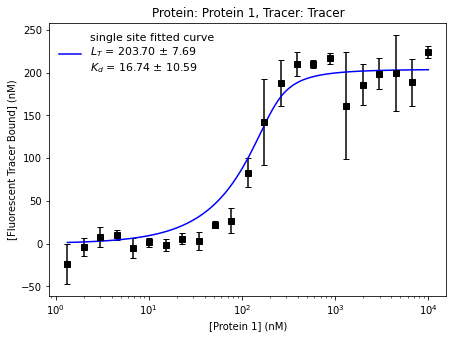

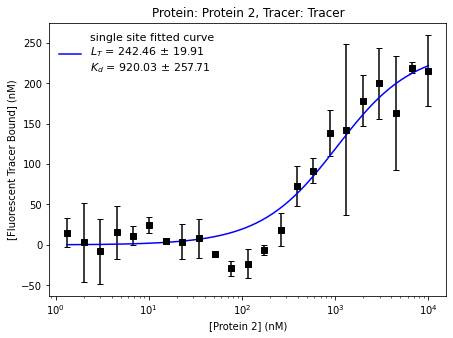

In [26]:
my_data.plot_kd()

To overlay data for specified proteins and tracers on a single graph pass the additional argument `overlay=True`.

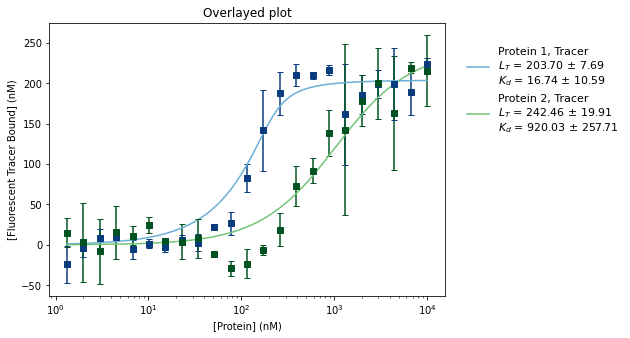

In [27]:
my_data.plot_kd(overlay=True)

To export the graphs either pass the `export=True` to save them in the same location as this notebook or pass a string with path to preferred directory (e.g. `export="C:\\folder1\\folder2\\"` for Windows OS)

<h2>Importing the fitting parameters</h2>

You can import the fitting parameters to the `final_fit` data frame from a csv file using the `import_params` and passing a file name or file path. 

<h2>Exporting the fitting parameters</h2>

The `export_params` function exports the `final_fit`data frame and the `fit_params` data from each repeat as csv (`file_type='csv'`) or Excel (`file_type='excel'`) files. Optionally, you can povide a path to directory in which the files will be saved using the `path` argument.

In [29]:
my_data.export_params()

The fitting parameters were exported to the csv files.


<h2>Exporting the data</h2>

The `export_data` function exports anisotropy, intensity and amount bound data for proteins and tracer and or all repeats as an Excel file. ptionally, you can povide a path to directory in which the files will be saved using the `path` argument.

In [30]:
my_data.export_data()

<h2>Setting the values of fitting parameters</h2>

You can manually change the fitting parameters for any protein-tracer pair in the `final_fit` data frame using the `set_fitparams` function. You have to provide protein name (`prot`) and tracer name (`trac`) as strings to identify the proetin-tracer pair for which the change will take place. The parameters to be changed are accepted as keyword arguments (e.g. `rmax=0.4`, etc.).

In [31]:
my_data.set_fitparams(prot='Protein 1', trac='Tracer', rmin=10, LT=1000)

In [32]:
my_data.final_fit

,,,rmin,rmin error,rmax,rmax error,lambda,Kd,Kd error,LT,LT error
Protein 1,Tracer,-,10,0.00308432,0.268484,0.00317768,1,16.7358,10.5857,1000.000000,7.691327
Protein 2,Tracer,-,0.131289,0.00274416,0.230477,0.00533703,1,920.034,257.705,242.455122,19.906863


## Structure of the data dictionary

Data imported from raw data files and the results of subsequent calculations are stored in the `data_dict` which is a multilevel dictionary cotaining a separate dictionary for each repeat. The repeat dictionaries contain two items: data frame with `'metadata'` (date and time of recording the data, etc) and a `'data'` dictionary. The `'data'` dictionary contains data frames with anisotropy and intensity (raw and corrected), the `'fit_params'` data frame with fitting parameters resulting from the logisitc curve fitting and the following three dictionaries: `'r_mean'`, `'i_mean'` and `'amounnt_bound'`. Each of those dictioraies contains data frames with mean anisotropy, intensity and amount bound as values and 3-tuples (protein name, tracer name, competitor name) as keys.

In [33]:
my_data.data_dict['repeat_1']['data']['r_corrected']

,r_corrected
A1,NaN
A2,0.271019
A3,0.248009
A4,0.263263
A5,0.243118
...,...
P20,NaN
P21,NaN
P22,NaN
P23,NaN


In [34]:
my_data.data_dict['repeat_1']['data']['amount_bound'][('Protein 1','Tracer','-')]

,Protein Name,Protein Concentration,Tracer Name,Tracer Concentration,Competitor Name,Competitor Concentration,mean,std,sem
0,Protein 1,0.00,Tracer,200.0,-,NaN,-35.149700,5.463204,3.154182
1,Protein 1,1.34,Tracer,200.0,-,NaN,-23.858520,22.997107,13.277386
2,Protein 1,2.00,Tracer,200.0,-,NaN,-4.098457,11.011925,6.357738
3,Protein 1,3.01,Tracer,200.0,-,NaN,8.025734,11.835966,6.833498
4,Protein 1,4.51,Tracer,200.0,-,NaN,10.042315,5.363994,3.096904
5,Protein 1,6.77,Tracer,200.0,-,NaN,-5.168829,11.709339,6.760390
6,Protein 1,10.15,Tracer,200.0,-,NaN,1.349639,5.661274,3.268538
7,Protein 1,15.22,Tracer,200.0,-,NaN,-1.976633,6.935453,4.004186
8,Protein 1,22.84,Tracer,200.0,-,NaN,5.764873,6.068822,3.503836
9,Protein 1,34.25,Tracer,200.0,-,NaN,2.775649,10.634919,6.140073


In [35]:
my_data.data_dict['repeat_1']['data']['fit_params']

,,,rmin,rmin error,rmax,rmax error,r_EC50,r_EC50 error,r_hill,r_hill error,Ifree,Ifree error,Ibound,Ibound error,I_EC50,I_EC50 error,I_hill,I_hill error,lambda
Protein 1,Tracer,-,0.141182,0.00308432,0.268484,0.00317768,128.524,8.79571,3.41695,0.694311,343269,12706.3,443299,19712.4,456.389,217.405,2.7312,3.0814,1
Protein 2,Tracer,-,0.131289,0.00274416,0.230477,0.00533703,648.136,83.9266,2.08634,0.488165,300297,4072.69,314799,5670.9,114.771,3.21438e+08,56.3926,2.16819e+10,1


The value of g-factor is stored outside the `data_dict` as a class varaible and can accessed anytime by calling:

In [23]:
my_data.g_factor

1.0